<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/06_Exercise_Job_Demand.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Analyzing Data Science Job Demand

## Topics Covered

This exercise goes over:

* Data cleaning and preparation 
* Data management
* Extract from datetime
* Pivot tables
* Index management

## Question

In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:
* General trend of data jobs in demand. We're going to look at it by month.

Load data.

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\pili_\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Demand of Data Jobs

1. First step is we're only going to look at roles in the United States. So we're going to create a copy of our DataFrame and only include roles that are in the United States.

In [2]:
#I'm going to do it with Argentina
df_Argentina = df.copy()
df_Argentina = df_Argentina[df['job_country'] == 'Argentina']
df_Argentina
#df_Argentina = df[df['job_country'] == 'Argentina'].copy()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
236,Data Scientist,Científico de Datos LLM,Anywhere,via LinkedIn,Full-time,True,Argentina,2023-10-08 13:46:02,False,False,Argentina,None,NaN,NaN,Turing,None,None
417,Senior Data Scientist,Data Science SR Puerto Madero,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-07-03 13:17:35,False,False,Argentina,None,NaN,NaN,Werben Capital Human,"['java', 'scala']","{'programming': ['java', 'scala']}"
863,Data Engineer,Data Engineer Jr,Argentina,via LinkedIn,Full-time,False,Argentina,2023-05-31 14:00:43,True,False,Argentina,None,NaN,NaN,Randstad Argentina,"['python', 'azure']","{'cloud': ['azure'], 'programming': ['python']}"
1131,Data Scientist,Data & Applied Intelligence #hub,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-09-03 13:43:27,False,False,Argentina,None,NaN,NaN,Accenture,"['sql', 'python', 'sql server', 'postgresql', ...","{'cloud': ['azure', 'aws', 'gcp'], 'databases'..."
1140,Software Engineer,Visual Basic Developer (with Data experience) ...,Anywhere,via LinkedIn,Full-time,True,Argentina,2023-03-19 13:45:03,True,False,Argentina,None,NaN,NaN,Listopro,"['excel', 'confluence']","{'analyst_tools': ['excel'], 'async': ['conflu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785605,Senior Data Engineer,"Sr. Data Architect, Professional Services","Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-01 06:34:24,False,False,Argentina,None,NaN,NaN,Emprego,"['sql', 'java', 'javascript', 'python', 'nosql...","{'cloud': ['aws', 'redshift'], 'databases': ['..."
785608,Software Engineer,Senior Software Engineer,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-09-28 06:29:25,True,False,Argentina,None,NaN,NaN,Emprego,"['php', 'javascript', 'css', 'sass', 'sql', 'n...","{'libraries': ['react', 'graphql', 'kafka'], '..."
785638,Data Analyst,Data Analyst,"Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-10-27 06:47:13,False,False,Argentina,None,NaN,NaN,Emprego,"['python', 'r', 'sql', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'prog..."
785668,Data Analyst,Jr Data Analyst,Argentina,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-29 06:47:14,True,False,Argentina,None,NaN,NaN,Emprego,"['python', 'excel', 'tableau', 'power bi', 'sp...","{'analyst_tools': ['excel', 'tableau', 'power ..."


In [3]:
## Skill count per month for data analysts
df_US = df[df['job_country'] == 'United States'].copy()

2. Since we're getting the count by month we need to aggregate by month. We can do this by first extracting the month from our `job_posted_date` column.

In [4]:
#df_Argentina['month'] = df['job_posted_date'].dt.month --> Asi seria si quisieramos solo el numero del mes
df_Argentina['month'] = df['job_posted_date'].dt.strftime('%B') #--> la funcion asi formatea el string y el %B viene de como se representa dentro de python las fechas
df_Argentina[['job_posted_date', 'month']].head()

,job_posted_date,month
236,2023-10-08 13:46:02,October
417,2023-07-03 13:17:35,July
863,2023-05-31 14:00:43,May
1131,2023-09-03 13:43:27,September
1140,2023-03-19 13:45:03,March


In [5]:
# extract the month name from 'job_posted_date'
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US[['job_posted_date', 'job_posted_month']].head()

,job_posted_date,job_posted_month
0,2023-06-16 13:44:15,June
3,2023-07-04 13:01:41,July
5,2023-11-07 14:01:59,November
6,2023-03-27 13:18:18,March
9,2023-04-23 13:02:57,April


3. Next let's pivot by month and `job_title_short` and get the count. 

In [16]:
df_Arg_pivot = df_Argentina.pivot_table(index=df_Argentina['month'], columns=df_Argentina['job_title_short'], aggfunc='size')

In [7]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [15]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


4. Let's sort this.

NOTE: See bottom of this notebook for easier way to do this.

In [17]:
df_Arg_pivot = df_Arg_pivot.reset_index()
df_Arg_pivot['month_no'] = pd.to_datetime(df_Arg_pivot['month'], format='%B').dt.month
df_Arg_pivot = df_Arg_pivot.sort_values('month_no')
df_Arg_pivot = df_Arg_pivot.set_index('month')
df_Arg_pivot = df_Arg_pivot.drop(columns='month_no')
df_Arg_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month,,,,,,,,,,
January,50,52,117,167,131,22,24,45,38,202
February,15,8,68,98,67,19,13,28,10,46
March,19,11,58,150,85,17,9,47,21,61
April,38,7,79,175,86,16,19,46,21,51
May,17,3,39,91,56,10,8,46,9,34
June,18,10,75,156,114,20,11,35,22,27
July,37,25,138,195,207,35,32,46,41,91
August,58,62,219,292,256,40,59,97,60,224
September,49,33,141,228,163,19,20,50,37,119


In [11]:
# sort job_posted_month_name in df_US_pivot by job_posted_month value
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


5. Let's now graph this.

Now we could plot all of this

<Axes: xlabel='month'>

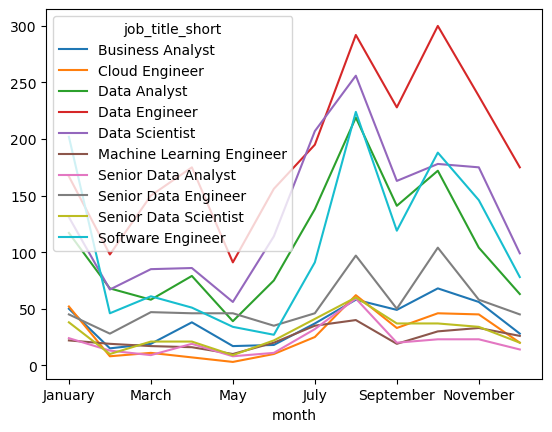

In [18]:
df_Arg_pivot.plot(kind='line')

<Axes: xlabel='job_posted_month'>

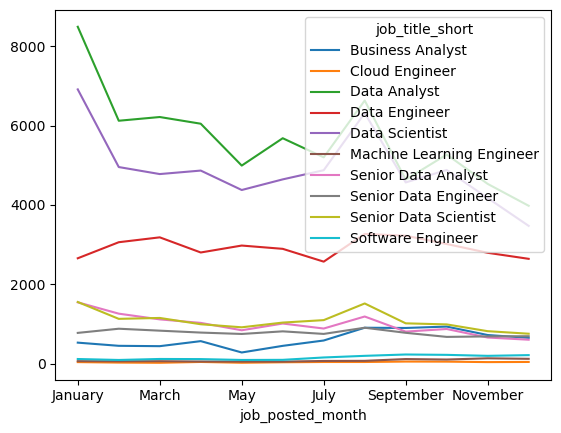

In [19]:
df_US_pivot.plot(kind='line')

Instead we'll just focus on the top 3 roles.

In [20]:
top3 = df_Argentina['job_title_short'].value_counts().head(3)
top3 = top3.index.tolist()
top3

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [21]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

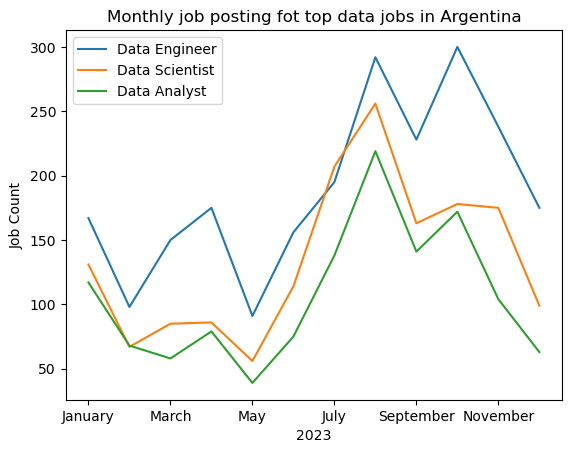

In [23]:
df_Arg_pivot[top3].plot(kind='line')
plt.title('Monthly job posting fot top data jobs in Argentina')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

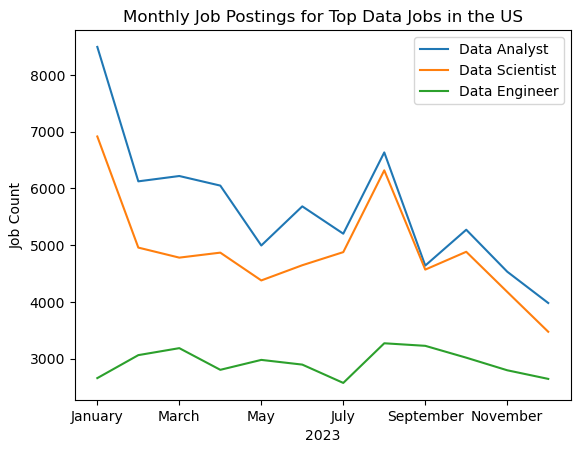

In [24]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

## Easier Method to Sort Months

After filming the video portion for this I found there is an easier way to sort the months. using the `.to_period('M')` method. 

In [ ]:
# extract the month name from 'job_posted_date'
df_US['job_posted_month'] = df_US['job_posted_date'].dt.to_period('M')

In [ ]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_US_pivot

In [ ]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()